<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

1) 
\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}
Tomando k=q=1
\begin{equation}
V_ = \frac{z}{\sqrt{z^2+R^2}}
\end{equation}



In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
R=0.1e-3
z=sp.symbols('z')
def v(z):
  return z/sp.sqrt(z**2+R**2)

v_=sp.diff(v(z),z)
v_

-z**2/(z**2 + 1.0e-8)**(3/2) + 1/sqrt(z**2 + 1.0e-8)

In [ ]:
e=sp.lambdify(z,v_,'numpy')

v_n=sp.lambdify(z,v(z),'numpy')

In [ ]:
z_=np.linspace(0,0.001,1000)

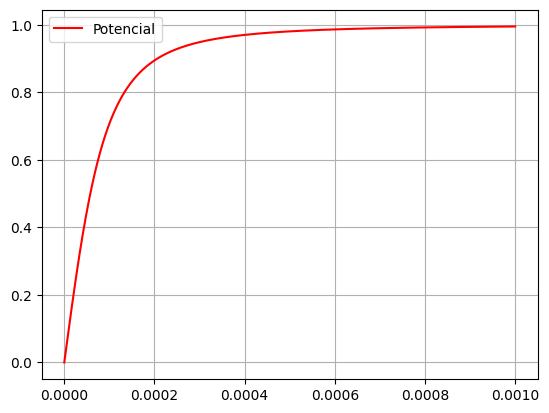

In [ ]:
plt.plot(z_,v_n(z_),'r',label=('Potencial'))
plt.legend()
plt.grid()

Evaluamos la función derivada con sympy (e) y comparamos con la función derivative *con z=0.002*

In [ ]:
d_e=-e(0.0002)
d_e

-894.4271909999161

In [ ]:
d_d=derivative(v_n,0.0002,dx=1e-8)

<ipython-input-8-6ab3f19d6ea3>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_d=derivative(v_n,0.0002,dx=1e-8)


In [ ]:
D=[]
for i in z_:
  d=derivative(v_n,i,dx=1e-8)
  D.append(-d)
  print(-d)

<ipython-input-9-9460a9012e45>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d=derivative(v_n,i,dx=1e-8)


-9999.999950000001
-9998.497133761364
-9993.990942748325
-9986.488142158662
-9975.9999810059
-9962.542152817943
-9946.134740962398
-9926.80214893793
-9904.573016072254
-9879.480119135558
-9851.56026049247
-9820.854143452461
-9787.406235588907
-9751.2646208317
-9712.480841204962
-9671.109729134098
-9627.20923127075
-9580.840224837628
-9532.066327498645
-9480.953701786199
-9427.570855097267
-9371.988436344958
-9314.279030202266
-9254.516950042702
-9192.778030446547
-9129.139420351039
-9063.67937761332
-8996.477065986719
-8927.612355261183
-8857.165625328345
-8785.217574977522
-8711.849035980546
-8637.140793127384
-8561.173410742695
-8484.027066182898
-8405.781390655176
-8326.515317857997
-8246.306940590253
-8165.233375642678
-8083.370637190778
-8000.793518703197
-7917.575483532002
-7833.78856419048
-7749.503270237934
-7664.788504774256
-7579.711489394403
-7494.337697452891
-7408.730795452345
-7322.952592406229
-7237.062996814924
-7151.119981130271
-7065.179553283896
-6979.2957351294535
-

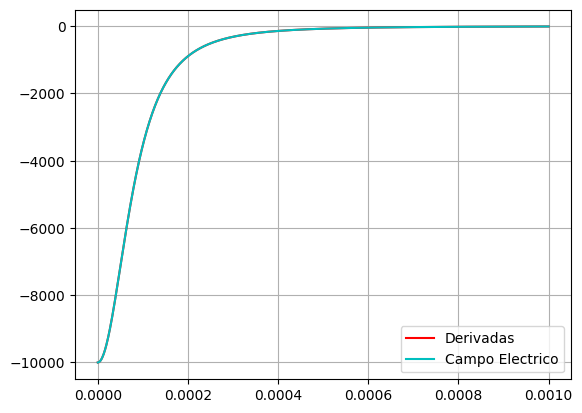

In [ ]:
plt.plot(z_,D,"r",label=('Derivadas'))
plt.plot(z_,-e(z_),"c-",label=('Campo Electrico'))
plt.legend()
plt.grid()

Lo hacemos vectorizado



In [ ]:
vect=np.vectorize(derivative)
dv=vect(v_n,z_,dx=1e-8)

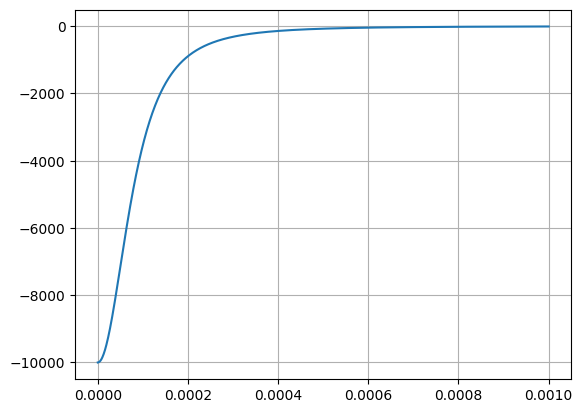

In [ ]:
plt.plot(z_,-dv)
plt.grid()

Usando kq=1 y a R como un argumento de la función:

In [ ]:
def potencial(z,R,kq):
  if (z>=0):
    V= z*kq/np.sqrt(z**2+R**2)
  else:
    V=0
  return V

In [ ]:
z=np.linspace(0,0.002,100)
#z0=0.002
kq=1
R=0.1E-3

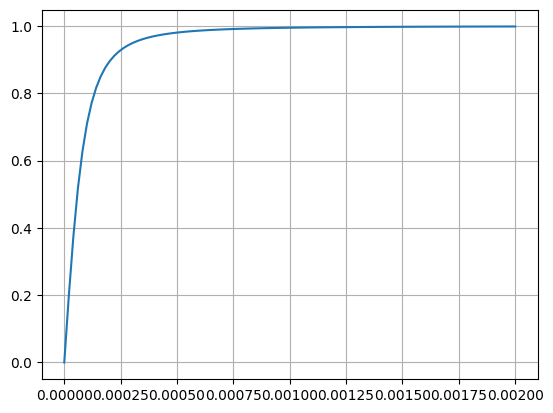

In [ ]:
pot=np.vectorize(potencial)
plt.plot(z,pot(z,R,kq))
plt.grid()

In [ ]:
derivative_=np.vectorize(derivative,excluded=['args'])

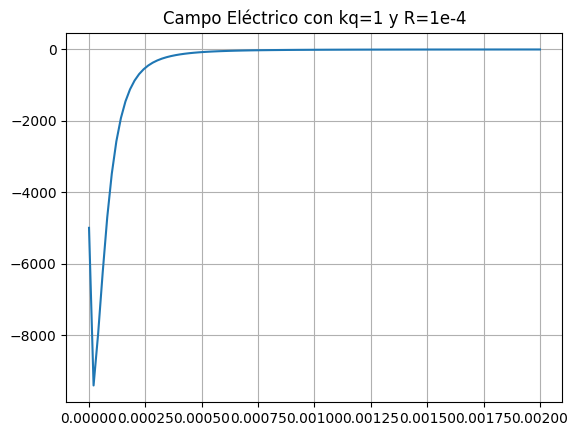

In [ ]:
grad=derivative_(potencial,z,dx=1E-6,args=(R,kq))
campo=-grad
plt.plot(z,campo)
plt.title('Campo Eléctrico con kq=1 y R=1e-4')
plt.grid()

Ahora definimos una función que nos diga e potencial de un disco y de un anillo\:
Disco:
\begin{equation}
V_ = \frac{q}{\pi R^2}2k\pi\sqrt{z^2+R^2}-z
\end{equation}

In [ ]:
def potencial_s(z,R,kq,select):
  if(select=='anillo'):
    V= z*kq/np.sqrt(z**2+R**2)
  elif(select=='disco'):
    V=(2*kq/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error, la palabra debe ser anillo o disco')
    V= None
  return V

In [ ]:
print('El potencia de un anillo en 0.001 es de:', potencial_s(0.001,0.1E-3,kq=1,select='anillo'))

El potencia de un anillo en 0.001 es de: 0.9950371902099892


In [ ]:
z=np.linspace(0,0.002,100)
#z0=0.002
kq=1
R=0.1E-3

Anillo

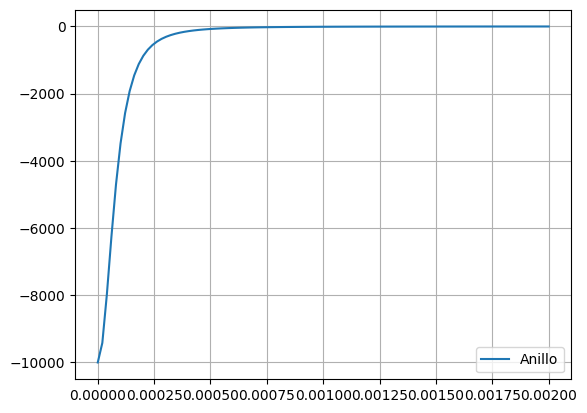

In [ ]:
select1 = 'anillo'
grad1=derivative_(potencial_s,z,dx=1E-6,args=(R,kq,select1))
campo1=-grad1

plt.plot(z,campo1,label='Anillo')
plt.legend()
plt.grid()

Disco

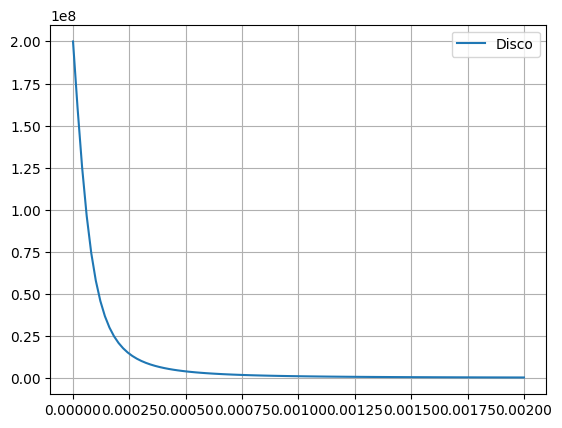

In [ ]:
select2 = 'disco'
grad2=derivative_(potencial_s,z,dx=1E-6,args=(R,kq,select2))
campo2=-grad2

plt.plot(z,campo2,label='Disco')
plt.legend()
plt.grid()

Otra cosa:


In [ ]:
select='otra cosa'
try:
  gradiente=derivative_(potencial_s,z,dx=1E-6,args=(R,kq,select))
  campoelect=-gradiente
except:
  print('Error')

Error, la palabra debe ser anillo o disco
Error


Programa:

In [ ]:
np.savetxt('campo_electrico_anillo.txt',campo1)
np.savetxt('campo_electrico_disco.txt',campo2)

In [ ]:
!ls

campo_electrico_anillo.txt  campo_electrico_disco.txt  sample_data
